In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных я должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.

В качестве набора данных мы будем использовать набор данных по трудосустройству программистов https://www.kaggle.com/datasets/ayushtankha/70k-job-applicants-data-human-resource

Эта задача является очень актуальной т.к. многие инженеры-программисты не могут определить свой шанс трудоустройства при поиске работы.

Датасет состоит из файла: stackoverflow_full.csv - выборка

Датасет содержит следующие колонки:
- Age: возраст заявителя >35 лет или <35 лет (категориальный)
- EdLevel: уровень образования заявителя (бакалавриат, магистр, доктор) (категориальный)
- Пол: пол заявителя (мужчина, женщина или небинарный) (категориальный)
- MainBranch: является ли заявитель профессиональным разработчиком (категориальный)
- YearsCode: как долго заявитель программирует (целое число)
- YearsCodePro: как долго заявитель занимается программированием в профессиональном контексте (целое число).
- PreviousSalary: зарплата заявителя на предыдущей работе (плавающая).
- ComputerSkills: количество компьютерных навыков, которыми владеет заявитель (целое число).
- Employed: целевая переменная, был ли соискатель принят на работу (категориальный).



Будем решать задачу классификации: Для решения задачи классификации в качестве целевого признака будем использовать "Employed". Поскольку признак содержит только значения 0 и 1, то это задача бинарной классификации.

# **Импортируем библиотеки**

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc


from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [5]:
df = pd.read_csv(("stackoverflow_full.csv"))

In [6]:
df.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


# **Анализ данных**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


In [8]:
# Убираем Unnamed: 0 столбец
df.drop(columns = 'Unnamed: 0', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             73462 non-null  object 
 1   Accessibility   73462 non-null  object 
 2   EdLevel         73462 non-null  object 
 3   Employment      73462 non-null  int64  
 4   Gender          73462 non-null  object 
 5   MentalHealth    73462 non-null  object 
 6   MainBranch      73462 non-null  object 
 7   YearsCode       73462 non-null  int64  
 8   YearsCodePro    73462 non-null  int64  
 9   Country         73462 non-null  object 
 10  PreviousSalary  73462 non-null  float64
 11  HaveWorkedWith  73399 non-null  object 
 12  ComputerSkills  73462 non-null  int64  
 13  Employed        73462 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 7.8+ MB


In [10]:
df.shape

(73462, 14)

In [11]:
df.describe()

,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


In [12]:
df.dtypes

Age                object
Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
MainBranch         object
YearsCode           int64
YearsCodePro        int64
Country            object
PreviousSalary    float64
HaveWorkedWith     object
ComputerSkills      int64
Employed            int64
dtype: object

In [13]:
# Проверяем наличие пропущенных значений и считаем их для каждого столбца.
missing_values = df.isna().sum()

# Смотрим количество пропущенных значений для каждого столбца
print(missing_values)

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64


In [14]:
# Удаляем столбец, так как он имеет много нулевых значений

df.drop(columns = 'HaveWorkedWith', inplace=True)

In [15]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,2,0


In [16]:
# Проверяем наличие пропущенных значений и подсчитайте их для каждого столбца.
missing_values = df.isna().sum()

# Смотрим количества пропущенных значений для каждого столбца
print(missing_values)

Age               0
Accessibility     0
EdLevel           0
Employment        0
Gender            0
MentalHealth      0
MainBranch        0
YearsCode         0
YearsCodePro      0
Country           0
PreviousSalary    0
ComputerSkills    0
Employed          0
dtype: int64


In [17]:
df.dtypes

Age                object
Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
MainBranch         object
YearsCode           int64
YearsCodePro        int64
Country            object
PreviousSalary    float64
ComputerSkills      int64
Employed            int64
dtype: object

In [18]:
# Проверяем количество уникальных значений для всех типов данных
df.select_dtypes(include='object').nunique()

Age                2
Accessibility      2
EdLevel            5
Gender             3
MentalHealth       2
MainBranch         2
Country          172
dtype: int64

In [19]:
# Country имеет множество уникальных ценностей; визуализируем их
df.Country.unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'Singapore', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Turkey',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Chile', 'Indonesia', 'Iran, Islamic Republic of...', 'Portugal',
       'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'Belgium',
       'United Arab Emirates', 'Bolivia', 'Austria', 'South Africa',
       'Norway', 'Serbia', 'Malta', 'Malaysia', 'Czech Republic',
       'Belarus', 'Madagascar', 'Kenya', 'Slovenia', 'Uruguay',
       'The former Yugoslav Republic of Ma

In [20]:
# Определяем функцию для разделения стран на континенты
def segment_country(country):
    if country in ['United States of America', 'Canada', 'Mexico']:
        return 'NorthAmerica'
    elif country in ['United Kingdom of Great Britain and Northern Ireland', 'France', 'Germany', 'Spain', 'Italy', 'Portugal', 'Belgium', 'Netherlands', 'Austria', 'Switzerland', 'Denmark', 'Ireland', 'Norway', 'Sweden', 'Finland', 'Greece', 'Czech Republic', 'Slovakia', 'Hungary', 'Poland']:
        return 'Europe'
    elif country in ['Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela, Bolivarian Republic of...', 'Bolivia']:
        return 'South America'
    elif country in ['China', 'Japan', 'South Korea', 'Viet Nam', 'India', 'Sri Lanka', 'Pakistan', 'Bangladesh', 'Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Thailand', 'Cambodia', 'Myanmar', 'Laos', 'Singapore', 'Hong Kong (S.A.R.)']:
        return 'Asia'
    elif country in ['Australia', 'New Zealand', 'Fiji', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Tonga']:
        return 'Australia'
    else:
        return 'Others' 

# Создаем новый столбец Continent
df['Continent'] = df['Country'].apply(segment_country)


In [21]:
df.Continent.unique()

array(['Europe', 'NorthAmerica', 'Asia', 'Others', 'South America',
       'Australia'], dtype=object)

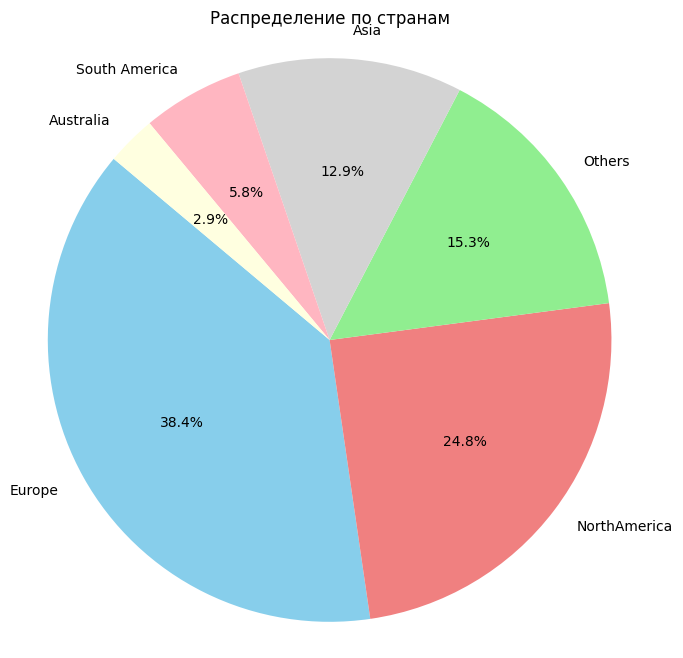

In [22]:
continent_counts = df['Continent'].value_counts()

# Создаем круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(continent_counts, labels=continent_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightgray', 'lightpink', 'lightyellow'])
plt.title('Распределение по странам')
plt.axis('equal')  

plt.show()


In [23]:
# Удаляем страну
df.drop(columns = 'Country', inplace=True)
# Также удаляем столбец YearsCodePro, поскольку у нас есть столбец YearsCode
df.drop(columns = 'YearsCodePro', inplace=True)

In [24]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent
0,<35,No,Master,1,Man,No,Dev,7,51552.0,4,0,Europe
1,<35,No,Undergraduate,1,Man,No,Dev,12,46482.0,12,1,Europe
2,<35,No,Master,1,Man,No,Dev,15,77290.0,7,0,Europe
3,<35,No,Undergraduate,1,Man,No,Dev,9,46135.0,13,0,NorthAmerica
4,>35,No,PhD,0,Man,No,NotDev,40,160932.0,2,0,Asia


# **Визуализируем атрибуты**

**Распределение по возрасту**


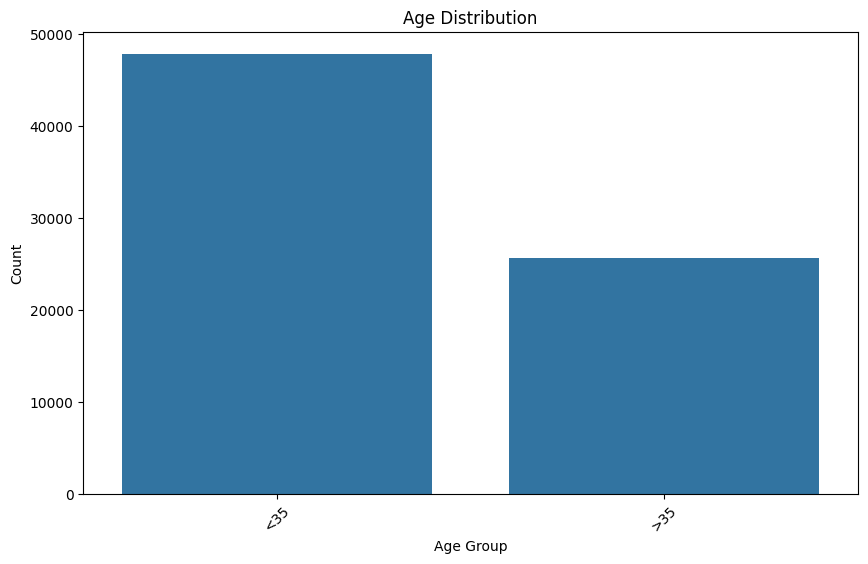

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age', order=['<35', '>35'])
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

**Распределение уровней образования**

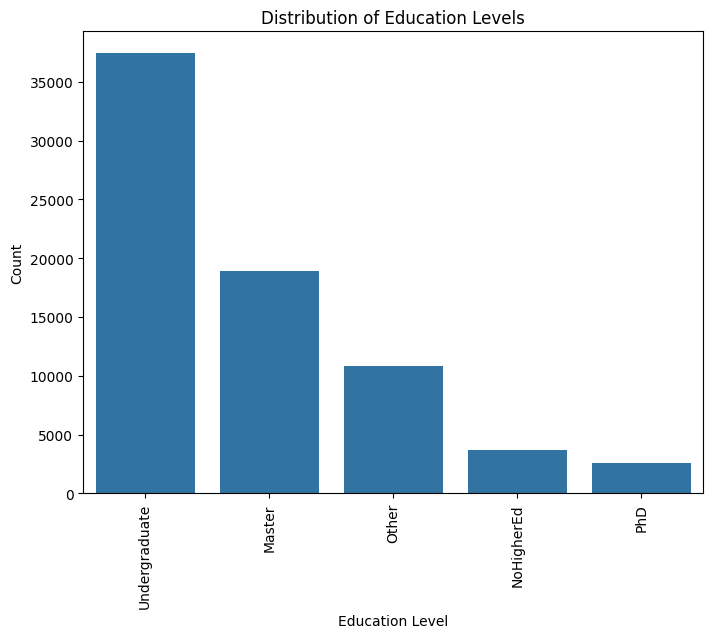

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='EdLevel', order=df['EdLevel'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()



**Распределение статуса занятости**

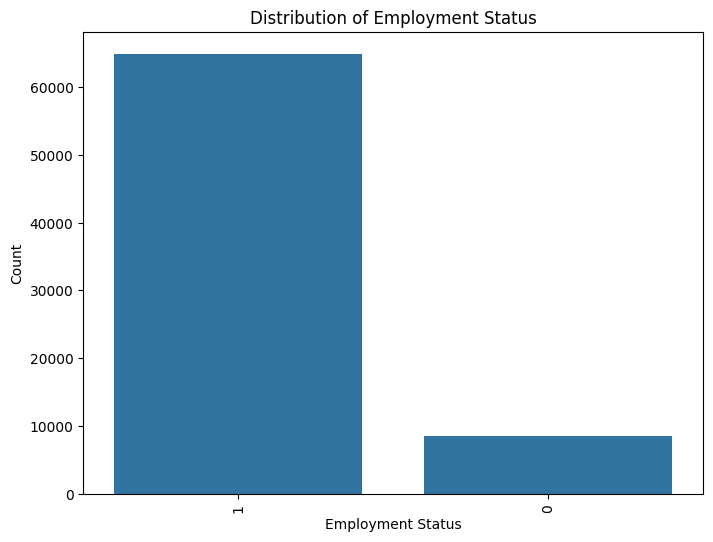

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employment', order=df['Employment'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Distribution of Employment Status')
plt.show()


**Связь между возрастом и статусом занятости**

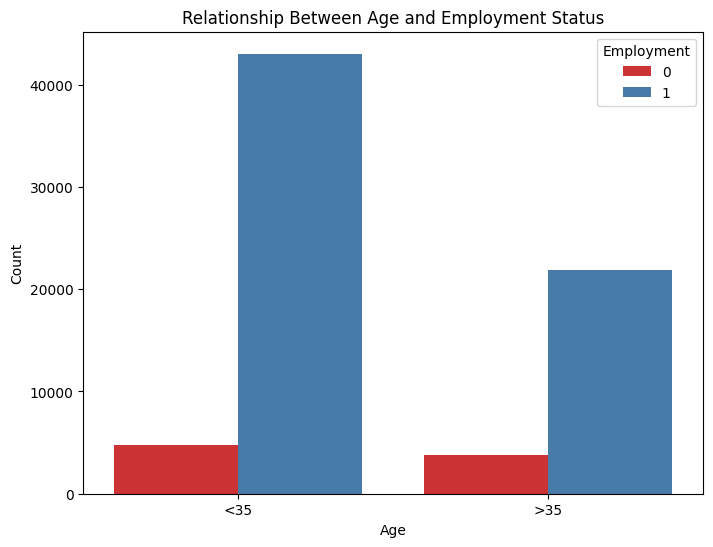

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age', hue='Employment', palette='Set1')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Relationship Between Age and Employment Status')
plt.show()

**Распределение стран по континентам**

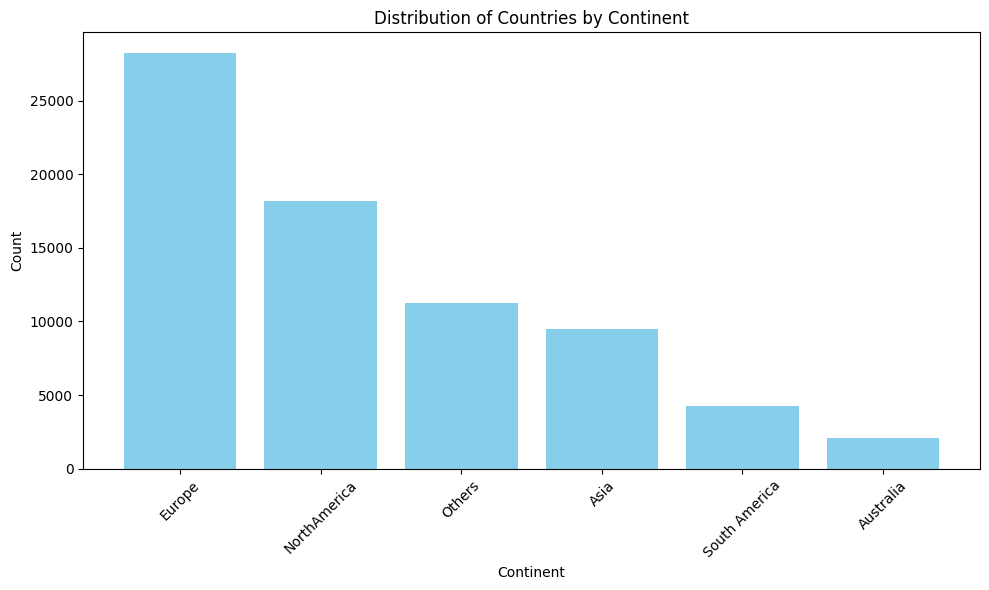

In [29]:
continent_counts = df['Continent'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(continent_counts.index, continent_counts.values, color='skyblue')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.title('Distribution of Countries by Continent')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**Распределение целевой переменной «Занятость»**

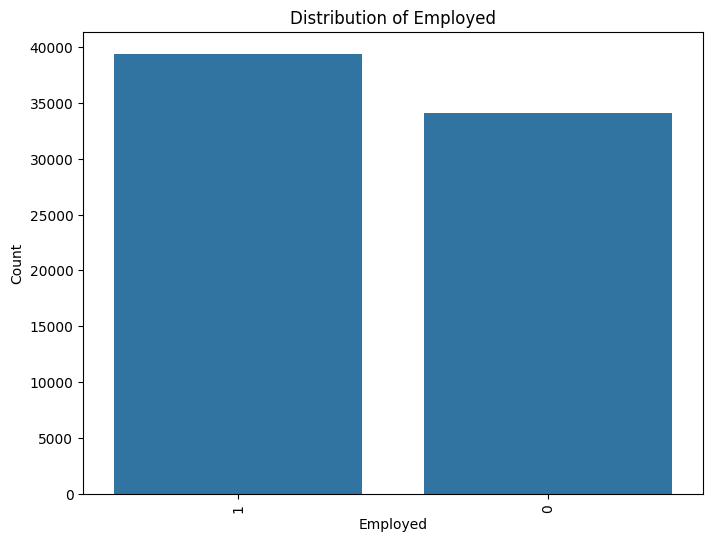

In [30]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Employed', order=df['Employed'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Employed')
plt.ylabel('Count')
plt.title('Distribution of Employed')
plt.show()


**Средняя предыдущая зарплата по континентам**

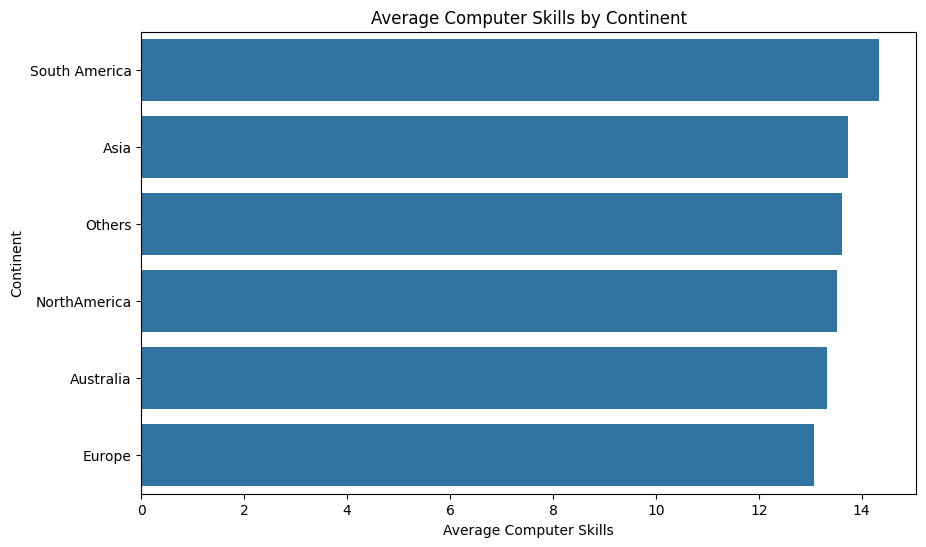

In [31]:
# Сгруппируем данные по «Континенту» и рассчитаем средний уровень компьютерных навыков для каждого континента.
continent_computer_skills = df.groupby('Continent')['ComputerSkills'].mean().reset_index()

# Отсортируем данные по среднему значению «ComputerSkills» в порядке убывания, чтобы сначала отобразить континенты с самым высоким уровнем квалификации.
continent_computer_skills = continent_computer_skills.sort_values(by='ComputerSkills', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=continent_computer_skills, x='ComputerSkills', y='Continent')
plt.xlabel('Average Computer Skills')
plt.ylabel('Continent')
plt.title('Average Computer Skills by Continent')
plt.show()


**Continents with Highest Employment Percentage**

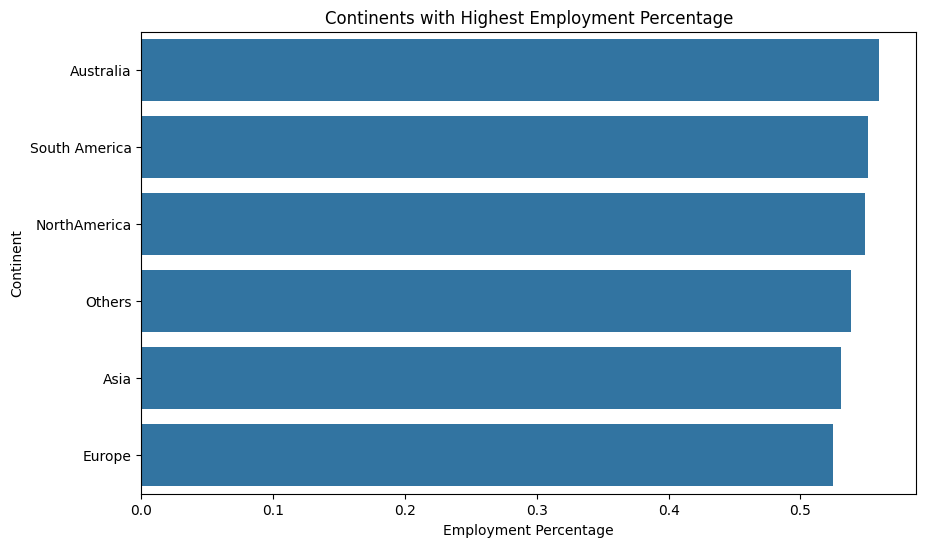

In [32]:
# Рассчитаем процент занятости для каждого континента
continent_employment = df.groupby('Continent')['Employed'].mean().reset_index()

# Отсортируем данные по проценту занятости в порядке убывания, чтобы сначала отобразить самые высокие проценты.
continent_employment = continent_employment.sort_values(by='Employed', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=continent_employment, x='Employed', y='Continent')
plt.xlabel('Employment Percentage')
plt.ylabel('Continent')
plt.title('Continents with Highest Employment Percentage')
plt.show()


# **Проверим корреляцию атрибутов**

In [33]:
df.dtypes

Age                object
Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
MainBranch         object
YearsCode           int64
PreviousSalary    float64
ComputerSkills      int64
Employed            int64
Continent          object
dtype: object

In [34]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent
0,<35,No,Master,1,Man,No,Dev,7,51552.0,4,0,Europe
1,<35,No,Undergraduate,1,Man,No,Dev,12,46482.0,12,1,Europe
2,<35,No,Master,1,Man,No,Dev,15,77290.0,7,0,Europe
3,<35,No,Undergraduate,1,Man,No,Dev,9,46135.0,13,0,NorthAmerica
4,>35,No,PhD,0,Man,No,NotDev,40,160932.0,2,0,Asia


In [35]:
df_copy = df.copy()

# Используем енкодер
label_encoder = LabelEncoder()
categorical_columns = ['Age', 'Accessibility', 'EdLevel', 'Gender', 'MentalHealth', 'MainBranch', 'Continent']
for col in categorical_columns:
    df_copy[col] = label_encoder.fit_transform(df[col])

In [36]:
df_copy.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent
0,0,0,0,1,0,0,0,7,51552.0,4,0,2
1,0,0,4,1,0,0,0,12,46482.0,12,1,2
2,0,0,0,1,0,0,0,15,77290.0,7,0,2
3,0,0,4,1,0,0,0,9,46135.0,13,0,3
4,1,0,3,0,0,0,1,40,160932.0,2,0,0


In [37]:
# Вычислим корреляционную матрицу
correlation_matrix = df_copy.corr()

In [38]:
print(correlation_matrix)

                     Age  Accessibility   EdLevel  Employment    Gender  \
Age             1.000000       0.015830 -0.090293   -0.070501 -0.037537   
Accessibility   0.015830       1.000000  0.001067   -0.015911  0.029551   
EdLevel        -0.090293       0.001067  1.000000    0.050759  0.004035   
Employment     -0.070501      -0.015911  0.050759    1.000000  0.014295   
Gender         -0.037537       0.029551  0.004035    0.014295  1.000000   
MentalHealth   -0.015928       0.107685  0.046803    0.010353  0.104701   
MainBranch      0.087110       0.004746 -0.048520   -0.009984  0.015908   
YearsCode       0.677317       0.030686 -0.093978   -0.080691 -0.068795   
PreviousSalary  0.322377      -0.015215 -0.013832    0.036980 -0.007945   
ComputerSkills -0.060769       0.022160  0.031123   -0.037904 -0.045627   
Employed       -0.030257       0.010659  0.045255   -0.012142 -0.038059   
Continent       0.066432       0.018505 -0.000778   -0.020745  0.006803   

                MentalHe

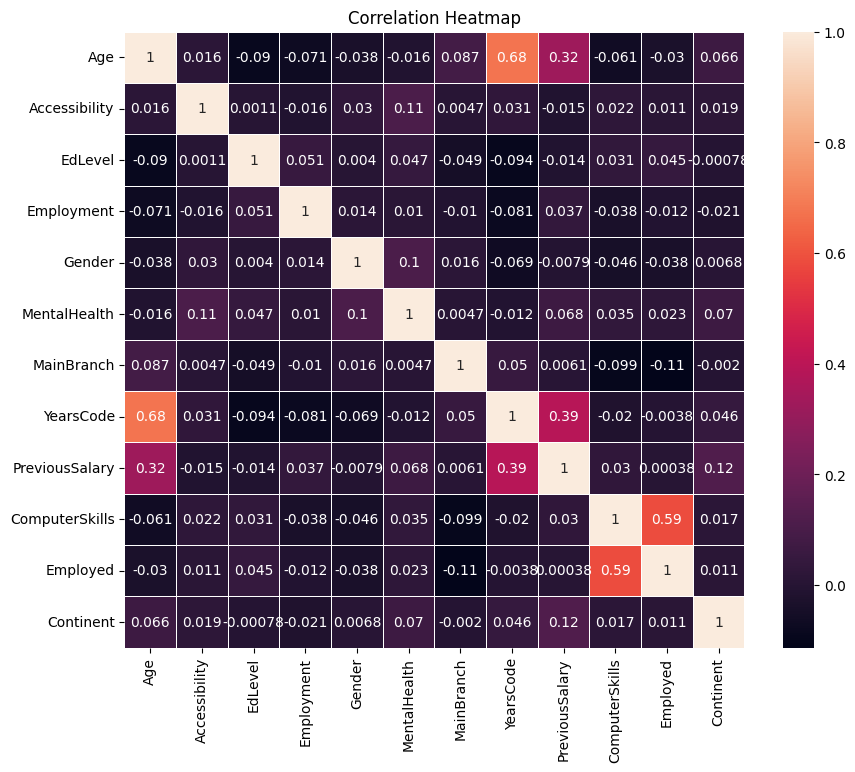

In [39]:
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **Проверем расхождение семплинга и выборки, удалите выбросы**

In [40]:
df_copy['Employed'].value_counts()

Employed
1    39392
0    34070
Name: count, dtype: int64

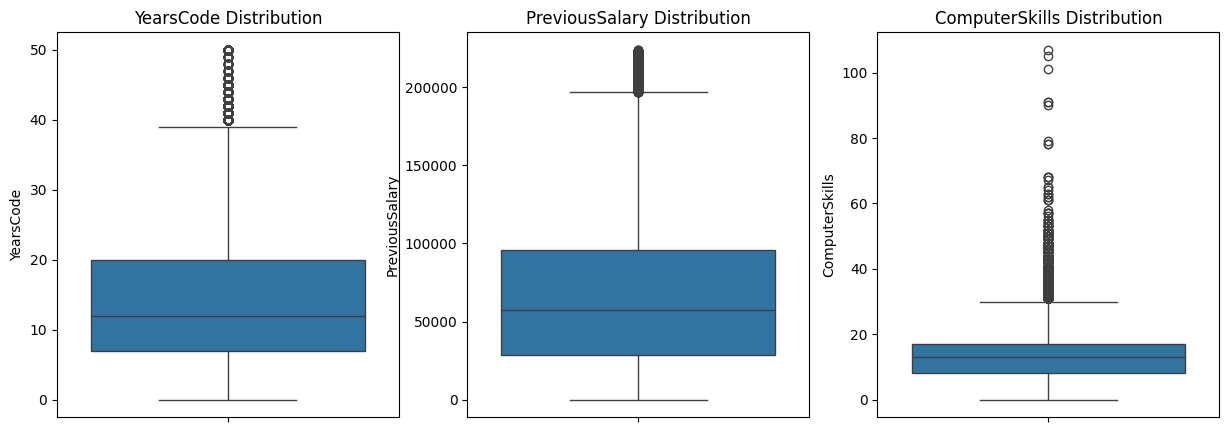

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
sns.boxplot(data=df_copy, y='YearsCode', orient='vertical')
plt.title('YearsCode Distribution')
plt.subplot(132)
sns.boxplot(data=df_copy, y='PreviousSalary', orient='vertical')
plt.title('PreviousSalary Distribution')
plt.subplot(133)
sns.boxplot(data=df_copy, y='ComputerSkills', orient='vertical')
plt.title('ComputerSkills Distribution')
plt.show()

In [42]:
# Сделаем функцию для удаления выбросов с помощью IQR
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    return data

df_copy = remove_outliers_iqr(df_copy, 'YearsCode')
df_copy = remove_outliers_iqr(df_copy, 'PreviousSalary')
df_copy = remove_outliers_iqr(df_copy, 'ComputerSkills')


In [43]:
df_copy.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,PreviousSalary,ComputerSkills,Employed,Continent
0,0,0,0,1,0,0,0,7,51552.0,4,0,2
1,0,0,4,1,0,0,0,12,46482.0,12,1,2
2,0,0,0,1,0,0,0,15,77290.0,7,0,2
3,0,0,4,1,0,0,0,9,46135.0,13,0,3
5,0,0,0,1,0,0,0,9,38915.0,5,0,2


# **Сделаем сплит для модели**

In [44]:
# Определяем фичи и таргет
X = df_copy.drop("Employed", axis=1)  # фичи
y = df_copy["Employed"]  # таргет

# Делаем выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))


Training set size: 54576
Testing set size: 13645


# **Обучение модели**

# **Logistic Regression**

In [46]:
logistic_regression = LogisticRegression(random_state=0)
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)

y_scores_lr = logistic_regression.predict_proba(X_train)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_scores_lr)
auc_lr = auc(fpr_lr, tpr_lr)


In [47]:
# Print the AUC
print(f'Logistic Regression - AUC: {auc_lr:.4f}')

Logistic Regression - AUC: 0.8063


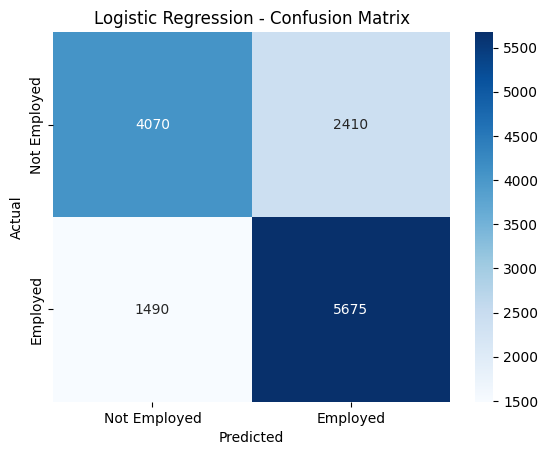

In [62]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure()
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

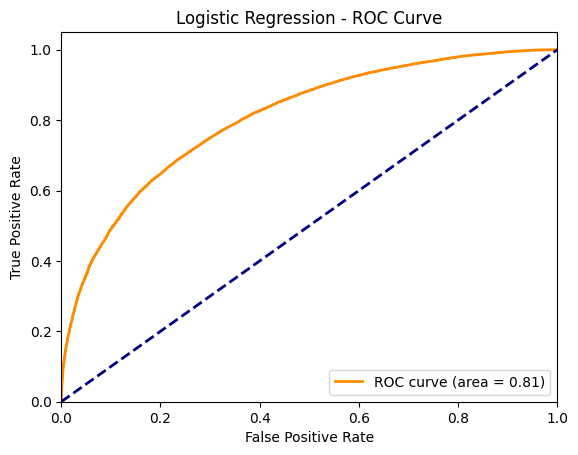

In [48]:
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - ROC Curve')
plt.legend(loc='lower right')
plt.show()

# **Decision Tree Classifier**

In [49]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Лучшие гиперпараметры
best_params = grid_search.best_params_

In [65]:
# Используем лучшие гиперпараметры для модели
best_decision_tree = DecisionTreeClassifier(random_state=42, **best_params)
best_decision_tree.fit(X_train, y_train)

y_pred_dt = best_decision_tree.predict(X_test)


In [66]:
y_scores_dt = best_decision_tree.predict_proba(X_train)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_train, y_scores_dt)
auc_dt = auc(fpr_dt, tpr_dt)

In [67]:
print(auc_dt)

0.8776660880612653


In [68]:
print(f'Best Hyperparameters for Decision Tree: {best_params}')
print(f'Decision Tree - AUC with Best Hyperparameters: {auc_dt:.4f}')

Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree - AUC with Best Hyperparameters: 0.8777


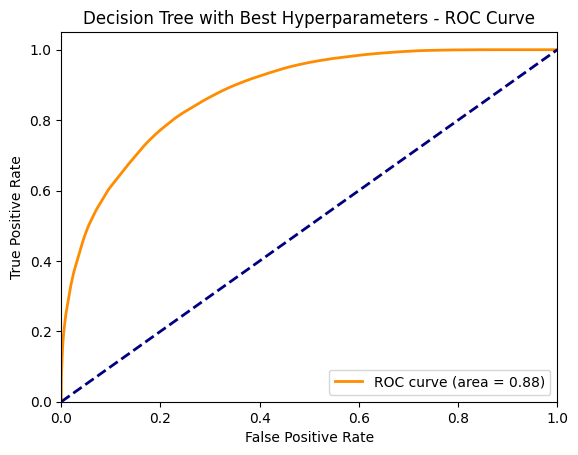

In [69]:
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree with Best Hyperparameters - ROC Curve')
plt.legend(loc='lower right')
plt.show()

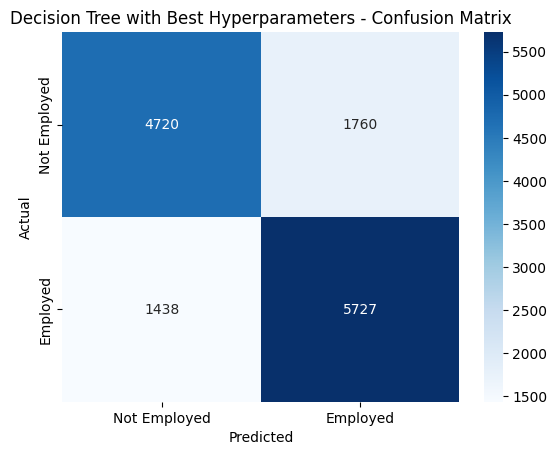

In [70]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure()
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree with Best Hyperparameters - Confusion Matrix')
plt.show()

In [71]:
print('F-1 Score : ',(f1_score(y_test, y_pred_dt, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_dt, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_dt, average='micro')))

F-1 Score :  0.7656284353242946
Precision Score :  0.7656284353242946
Recall Score :  0.7656284353242946


# **Random Forest Classifier**

In [72]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

/Users/konstantin.koretskiy/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [73]:
best_random_forest = RandomForestClassifier(random_state=42, **best_params)
best_random_forest.fit(X_train, y_train)

y_pred_rf = best_random_forest.predict(X_test)

In [74]:
y_scores_rf = best_random_forest.predict_proba(X_train)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, y_scores_rf)
auc_rf = auc(fpr_rf, tpr_rf)

In [75]:
print(f'Best Hyperparameters: {best_params}')
print(f'Random Forest - AUC with Best Hyperparameters: {auc_rf:.4f}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - AUC with Best Hyperparameters: 0.8789


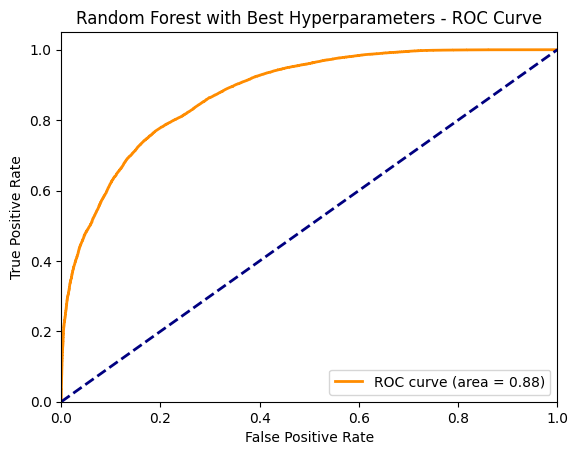

In [76]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest with Best Hyperparameters - ROC Curve')
plt.legend(loc='lower right')
plt.show()

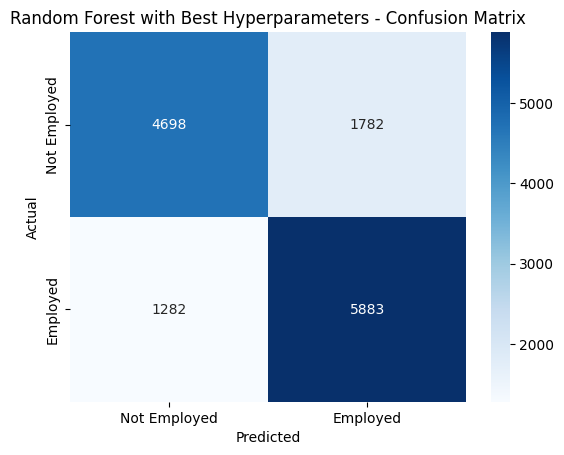

In [77]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure()
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest with Best Hyperparameters - Confusion Matrix')
plt.show()

In [78]:
print('F-1 Score : ',(f1_score(y_test, y_pred_rf, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_rf, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_rf, average='micro')))

F-1 Score :  0.7754488823744962
Precision Score :  0.7754488823744962
Recall Score :  0.7754488823744962


# **XGBoost Classifier**

In [79]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgboost = XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_xgb = grid_search.best_params_

In [80]:
best_xgboost = XGBClassifier(random_state=42, **best_params_xgb)
best_xgboost.fit(X_train, y_train)

y_pred_xgb = best_xgboost.predict(X_test)


In [81]:
y_scores_xgb = best_xgboost.predict_proba(X_train)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_train, y_scores_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

In [82]:
print(f'Best Hyperparameters for XGBoost: {best_params_xgb}')
print(f'XGBoost - AUC with Best Hyperparameters: {auc_xgb:.4f}')

Best Hyperparameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
XGBoost - AUC with Best Hyperparameters: 0.8677


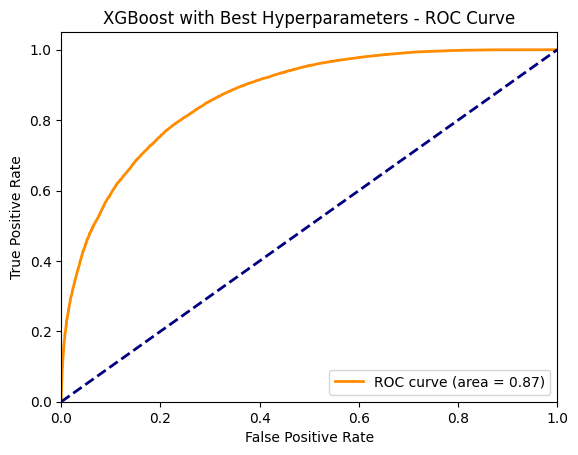

In [83]:
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (area = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost with Best Hyperparameters - ROC Curve')
plt.legend(loc='lower right')
plt.show()

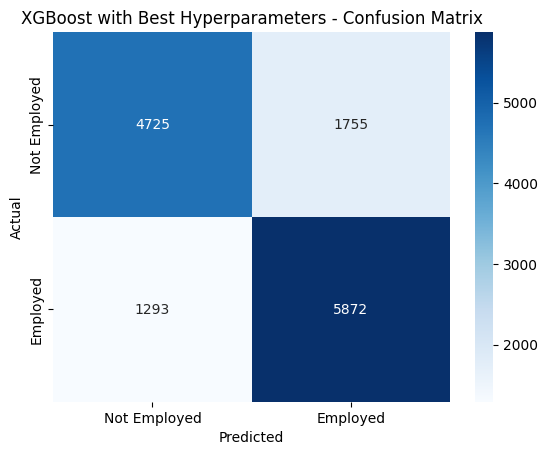

In [84]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure()
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Employed', 'Employed'], yticklabels=['Not Employed', 'Employed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost with Best Hyperparameters - Confusion Matrix')
plt.show()

In [72]:
print('F-1 Score : ',(f1_score(y_test, y_pred_xgb, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred_xgb, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred_xgb, average='micro')))

F-1 Score :  0.7766214730670575
Precision Score :  0.7766214730670575
Recall Score :  0.7766214730670575


# **ROC AUC**

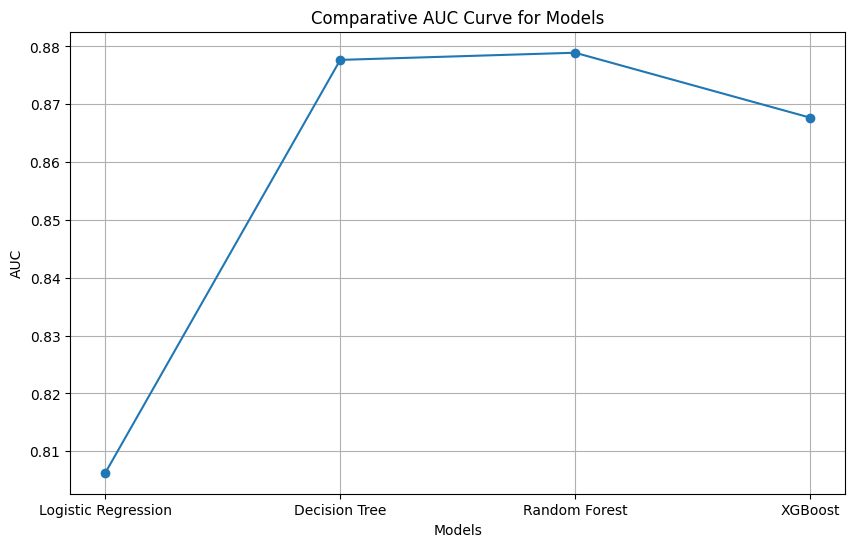

In [85]:
auc_values = [auc_lr, auc_dt, auc_rf, auc_xgb]

model_names = ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"]  

plt.figure(figsize=(10, 6))
plt.plot(model_names, auc_values, marker='o', linestyle='-')
plt.title('Comparative AUC Curve for Models')
plt.xlabel('Models')
plt.ylabel('AUC')
plt.grid(True)
plt.show()